In [3]:
import numpy as np
import mne
%matplotlib inline
import matplotlib.pyplot as plt
import scipy 
from scipy.stats import hmean,trim_mean
import pandas as pd

In [5]:
filename="suj11_l2nap_day2.vhdr"
raw = mne.io.read_raw_brainvision(filename, preload=True)
raw.info

Extracting parameters from suj11_l2nap_day2.vhdr...
Setting channel info structure...
Reading 0 ... 1806049  =      0.000 ...  1806.049 secs...


<Info | 17 non-empty fields
    bads : 'list | 0 items
    buffer_size_sec : 'float | 1.0
    ch_names : 'list | Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, CP5
    chs : 'list | 65 items (STIM: 1, EEG: 64)
    comps : 'list | 0 items
    custom_ref_applied : 'bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : 'list | 0 items
    filename : 'str | C:\Users\S.../suj11_l2nap_day2.eeg
    highpass : 'float | 0.0 Hz
    hpi_meas : 'list | 0 items
    hpi_results : 'list | 0 items
    lowpass : 'float | 500.0 Hz
    meas_date : 'int | 1490641625
    nchan : 'int | 65
    projs : 'list | 0 items
    sfreq : 'float | 1000.0 Hz
    acq_pars : 'NoneType
    acq_stim : 'NoneType
    ctf_head_t : 'NoneType
    description : 'NoneType
    dev_ctf_t : 'NoneType
    dig : 'NoneType
    experimenter : 'NoneType
    file_id : 'NoneType
    hpi_subsystem : 'NoneType
    kit_system_id : 'NoneType
    line_freq : 'NoneType
    meas_id : 'NoneType
    proj_id : 'NoneType
    proj_n

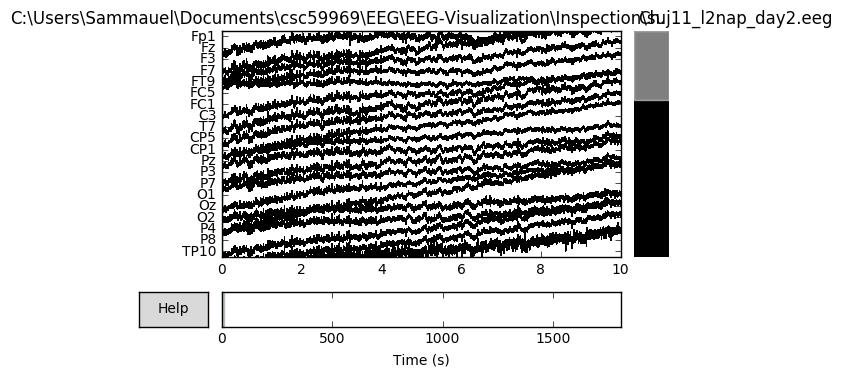

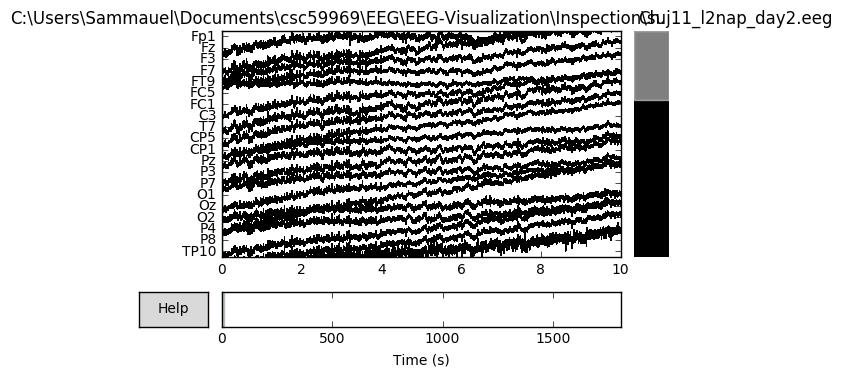

In [7]:
scalingDict=dict(mag=1e-12,grad=4e-11,eeg=20e-6,eog=150e-6,ecg=5e-4,
                 emg=1e-3,ref_meg=1e-12,misc=1e-3,stim=1,
                 resp=1,chpi=1e-4)

raw.plot(start=0.,# initial time to show
         duration=10.0,# time window (sec) to plot in a given time
         n_channels=20,# number of channels to plot at once
         scalings=scalingDict,)# scaling factor for traces. MNE-python documentation

Effective window size : 2.048 (s)


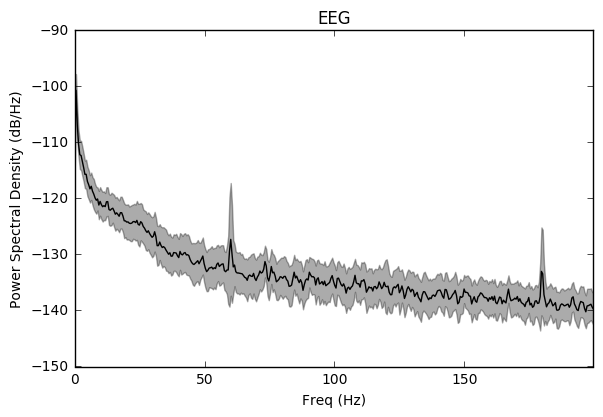

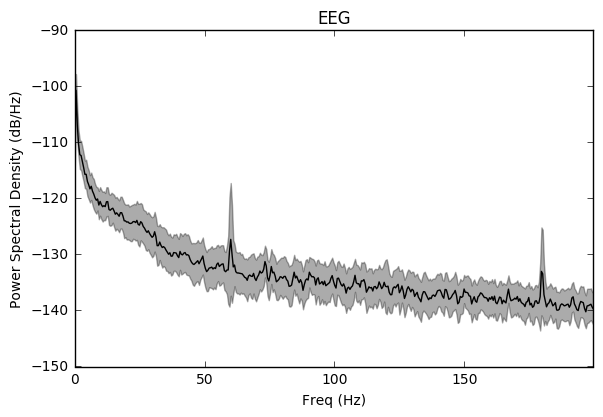

In [9]:
"Power Spectrial Density"
raw.plot_psd(tmin=0.0,# initial time to show
             tmax=60.0,# end time to show
             fmin=0.0,# initial frequency to show
             fmax=200.0,# end frequency to show
             area_mode='std',# change to 'range'
            )

In [11]:
from mne.preprocessing.ica import ICA

chan_list=raw.ch_names[:-2]# exclude 'AUX','STIM' channels
if 'LOc' not in chan_list:
    chan_list.append('LOc')
if 'ROc' not in chan_list:
    chan_list.append('ROc')
raw.pick_channels(chan_list)

raw.set_channel_types({'LOc':'eog','ROc':'eog'})

raw.pick_channels(chan_list)
picks=mne.pick_types(raw.info,meg=False,
                     eeg=True,# select only eeg channels to filter
                     eog=False,
                     stim=False)

raw.filter(None,
           200,#applying a low pass filter
           l_trans_bandwidth=0.01,
           h_trans_bandwidth='auto',
           filter_length=30,# with filter length of 30 seconds
           picks=picks)

noise_cov=mne.compute_raw_covariance(raw.set_eeg_reference(),picks=picks)

Low-pass filtering at 2e+02 Hz
h_trans_bandwidth chosen to be 50.0 Hz
Multiple deprecated filter parameters were used:
phase in 0.13 is "zero-double" but will change to "zero" in 0.14
fir_window in 0.13 is "hann" but will change to "hamming" in 0.14


<ipython-input-11-851a26790fb9>:23: DeprecationWarning: Multiple deprecated filter parameters were used:
phase in 0.13 is "zero-double" but will change to "zero" in 0.14
fir_window in 0.13 is "hann" but will change to "hamming" in 0.14
  picks=picks)


Adding average EEG reference projection.
1 projection items deactivated
Using up to 9030 segments
Number of samples used : 1806000
[done]
